The purpose of this exercise is to see Neural Network can be used to classify X-Ray scans from patients with pneumonia.

In [21]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import keras
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn
import os
from PIL import Image


Our data is located in three folders:

train= contains the training data/images for teaching our model.

val= contains images which we will use to validate our model. The purpose of this data set is to prevent our model from Overfitting. Overfitting is when your model gets a little too comofortable with the training data and can't handle data it hasn't see....too well.

test = this contains the data that we use to test the model once it has learned the relationships between the images and their label (Pneumonia/Not-Pneumonia)

In [15]:
train_folder= '/Users/ashok/Documents/Projects/Chest Xray/xray/train'
val_folder = '/Users/ashok/Documents/Projects/Chest Xray/xray/val'
test_folder = '/Users/ashok/Documents/Projects/Chest Xray/xray/test'

Setting up the training and testing folders

In [23]:
# train 
os.listdir(train_folder)
train_n = train_folder+'/NORMAL/'
train_p = train_folder+'/PNEUMONIA/'

Let's take a look at some of the pictures

1342
normal picture title:  NORMAL2-IM-0668-0001.jpeg
pneumonia picture title: person441_bacteria_1911.jpeg


Text(0.5, 1.0, 'Pneumonia')

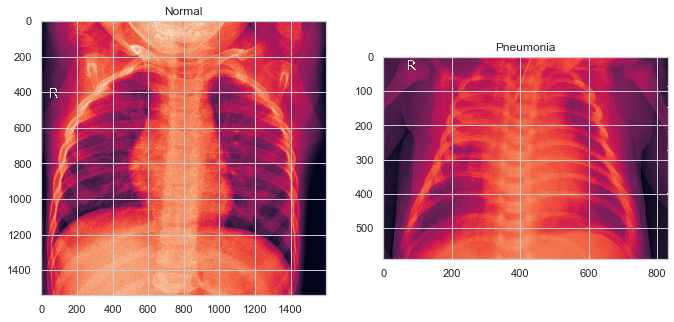

In [25]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic
norm_load = Image.open(norm_pic_address)
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
pne_pic =  os.listdir(train_p)[rand_norm]
pne_address = train_p+pne_pic
print('pneumonia picture title:', pne_pic)
pne_load = Image.open(pne_address)
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(pne_load)
a2.set_title('Pneumonia')

CNN model

In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Fitting the model to training dataset

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/Users/ashok/Documents/Projects/Chest Xray/xray/train',  # This is the source directory for training images
        target_size=(150, 150,),
        color_mode='grayscale',# All images will be resized to 300x3000
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 5216 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory('/Users/ashok/Documents/Projects/Chest Xray/xray/val',
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [6]:
callbacks= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=163,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps = 624,
callbacks=[callbacks])


Epoch 1/10
163/163 [==============================] - 198s 1s/step - loss: 0.3124 - accuracy: 0.8775 - val_loss: 0.4022 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 183s 1s/step - loss: 0.1531 - accuracy: 0.9479 - val_loss: 0.2020 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 184s 1s/step - loss: 0.1144 - accuracy: 0.9595 - val_loss: 0.8648 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 183s 1s/step - loss: 0.0984 - accuracy: 0.9663 - val_loss: 0.2021 - val_accuracy: 0.8750


In [8]:
test_data= test_datagen.flow_from_directory(
        '/Users/ashok/Documents/Projects/Chest Xray/xray/test',  # This is the source directory for training images
        target_size=(150, 150),
        color_mode='grayscale',# All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 612 images belonging to 2 classes.


In [9]:
test_accu = model.evaluate_generator(test_data,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 77.76963114738464 %
